# Fuel assembly study: 2B 1 family vs 7 families

## Import modules

In [1]:
import sys
import os
import pathlib
import re

import openmc
import openmc.mgxs as mgxs

import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter
from prettytable import PrettyTable

## Add location of OpenMC XS executable, setup ENDF xs path

In [2]:
# Add path to OpenMC binary
# os.environ['PATH'] += r':/path/to/openmc/bin'
#os.environ['PATH'] += r':/Users/jean.ragusa/repo/openmc/local/bin'

# Add location of OpenMC xs data
#%env OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-vii.1-hdf5/cross_sections.xml

# Are you ragusa?
your_files = os.getcwd()
if 'ragusa' in your_files:
    os.environ['OPENMC_CROSS_SECTIONS'] = '/home/ragusa/xs/endfb-viii.0-hdf5/cross_sections.xml'

# Start model

In [3]:
model=openmc.Model()

## Define Materials
***

In [4]:
uo2 = openmc.Material(name='uo2')

uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')

uo2.set_density('g/cm3', 10.257 )

uo2.temperature = 600

In [5]:
zirconium = openmc.Material(name="zirconium")

zirconium.add_nuclide('Zr90',  2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91',  4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92',  7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94',  7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96',  1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112', 4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54',  8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56',  1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57',  3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58',  4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50',  3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52',  6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53',  7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54',  1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')

zirconium.set_density('g/cm3',  6.56)

zirconium.temperature = 600

In [6]:
water = openmc.Material(name="water")

water.add_nuclide('H1',  4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')

water.add_s_alpha_beta('c_H_in_H2O')

water.set_density('g/cm3', 0.661)

water.temperature=600

In [7]:
helium = openmc.Material(name="helium")

helium.add_nuclide('He4',1, 'ao')

helium.set_density('g/cm3', 0.178E-03 )

helium.temperature=600

In [8]:
model.materials = openmc.Materials([uo2, zirconium, water,helium]) 
print(model.materials)

[Material
	ID             =	1
	Name           =	uo2
	Temperature    =	600
	Density        =	10.257 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	6.11864e-06  [ao]
	U235           =	0.000718132  [ao]
	U236           =	3.29861e-06  [ao]
	U238           =	0.0221546    [ao]
	O16            =	0.0457642    [ao]
, Material
	ID             =	2
	Name           =	zirconium
	Temperature    =	600
	Density        =	6.56 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.0218865    [ao]
	Zr91           =	0.00477292   [ao]
	Zr92           =	0.00729551   [ao]
	Zr94           =	0.00739335   [ao]
	Zr96           =	0.0011911    [ao]
	Sn112          =	4.68066e-06  [ao]
	Sn114          =	3.18478e-06  [ao]
	Sn115          =	1.64064e-06  [ao]
	Sn116          =	7.01616e-05  [ao]
	Sn117          =	3.70592e-05  [ao]
	Sn118          =	0.000116872  [ao]
	Sn119          =	4.14504e-05 

## Define individiual cells
***

In [9]:
# Global surfaces
pitch = 1.26

# Fuel radii
fuel_outer_radius = openmc.ZCylinder(r=0.4096)
clad_inner_radius = openmc.ZCylinder(r=0.418)
clad_outer_radius = openmc.ZCylinder(r=0.475)

# Guide tube radii
gt_inner_radius = openmc.ZCylinder(r=0.561)
gt_outer_radius = openmc.ZCylinder(r=0.602)

# Instrumentation radii
it_inner_radius = openmc.ZCylinder(r=0.559)
it_outer_radius = openmc.ZCylinder(r=0.605)

# Universe bounds
left   = openmc.XPlane(-pitch/2, boundary_type='transmission')
right  = openmc.XPlane( pitch/2, boundary_type='transmission')
bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
top    = openmc.YPlane( pitch/2, boundary_type='transmission')


### Define pincell universe

In [10]:
def pincell(family):

    fuel_region  = -fuel_outer_radius
    gap_region   = +fuel_outer_radius & -clad_inner_radius
    clad_region  = +clad_inner_radius & -clad_outer_radius
    water_region = +left & -right & +bottom & -top & +clad_outer_radius

    fuel = openmc.Cell(name=family+'-fuel')
    fuel.region = fuel_region
    fuel.fill = uo2
    new_fuel = uo2.clone()
    fuel.fill = new_fuel
    
    gap = openmc.Cell(name=family+'-fuel gap')
    gap.region = gap_region
    gap.fill = helium     
    
    clad = openmc.Cell(name=family+'-fuel clad')
    clad.region = clad_region
    clad.fill = zirconium
    
    moderator = openmc.Cell(name=family+'-moderator')
    moderator.region = water_region
    moderator.fill = water
    
    return openmc.Universe(name=family+'-pin_univ', cells=(fuel, clad, moderator,gap)), new_fuel

### Create guide tube universe

In [11]:
def guide():
    
    gt_water_in_region  = -gt_inner_radius
    gt_clad_region      = +gt_inner_radius & -gt_outer_radius
    gt_water_out_region = +gt_outer_radius & +left & -right & +bottom & -top
     
    gt_water_in = openmc.Cell(name='gt-water-in')
    gt_water_in.region = gt_water_in_region
    gt_water_in.fill = water
 
    gt_clad = openmc.Cell(name='gt-clad')
    gt_clad.region = gt_clad_region
    gt_clad.fill = zirconium

    gt_water_out = openmc.Cell(name='gt-water-out')
    gt_water_out.region = gt_water_out_region
    gt_water_out.fill = water
    
    return openmc.Universe(name='gt-univ', cells=(gt_water_in, gt_clad, gt_water_out))

### Create instrumentation tube universe

In [12]:
def instrument():
    
    it_water_in_region  = -it_inner_radius
    it_clad_region      = +it_inner_radius & -it_outer_radius
    it_water_out_region = +it_outer_radius & +left & -right & +bottom & -top
    
    it_water_in = openmc.Cell(name='it-water-in')
    it_water_in.region = it_water_in_region
    it_water_in.fill = water

    it_clad = openmc.Cell(name='it-clad')
    it_clad.region = it_clad_region
    it_clad.fill = zirconium

    it_water_out = openmc.Cell(name='it-water-out')
    it_water_out.region = it_water_out_region
    it_water_out.fill = water

    return openmc.Universe(name='it-univ', cells=(it_water_in, it_clad, it_water_out))

### Generate universes

In [13]:
gt_univ  = guide()
it_univ  = instrument()
material_list = [ helium, zirconium, water ]

## Generate assembly
***

In [14]:
height = 10 # height in z-dir
dr = 0.04   # cm of water that is outside assembly
one_eighth = True # either 1/8 or 1/4 of FA

In [15]:
def read_csv_to_2d_array(file_path):
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        data = [row for row in reader]
    return np.asarray(data)

def count_frequencies(data):
    flattened_data = [item for row in data for item in row]  # Flatten 2D array into a 1D list
    cell_frequencies = Counter(flattened_data)
    print("cell name frequency:")
    total = 0
    for key, value in cell_frequencies.items():
        print(f'"{key}": {value}')
        total += value
    print("total: ",total)

def fuel_keys(data, exclude_keys=["gt","it"]):
    flattened_data = [item for row in data for item in row]  # Flatten 2D array into a 1D list
    cell_frequencies = Counter(flattened_data)
    keys = list(cell_frequencies.keys())
    return [key for key in keys if key not in exclude_keys]

In [16]:
material_list = [ helium, zirconium, water ]
color_opt = 'cell' # 'material'

my_case = '2b'

test_mode = True

In [17]:
def delete_runtime_files(directory='.'):
    """
    Deletes all files with a .xml extension, files named statepoint.NNNNN.h5 where N is a digit,
    and the file named summary.h5 in the specified directory.

    Parameters:
    directory (str): The directory to search for files. Defaults to the current directory.
    """
    
    # Regular expression pattern to match files named statepoint.NNNNN.h5
    pattern = re.compile(r'statepoint\.\d{5}\.h5')

    # Iterate through files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if the file has a .xml extension, matches the pattern, or is named summary.h5
        if filename.endswith('.xml') or pattern.match(filename) or filename == 'summary.h5' \
           or filename == 'tallies.out':
            # Delete the file
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")


# Example usage:
# delete_runtime_files('/path/to/directory')  # specify the directory path if needed

In [18]:
def runtest(famsize,egroup_name):
    csv_filepath = 'FA_cell_names_'+str(famsize)+'_family.csv'
    
    lattice_csv = read_csv_to_2d_array(csv_filepath)
    count_frequencies(lattice_csv)
    
    if lattice_csv.shape[0] != lattice_csv.shape[1]:
        raise Exception('CSV array of cell names is not square.')
        
    size = lattice_csv.shape[0] #size of the assembly 
    
    fuel_names = fuel_keys(lattice_csv)
    
    pin_univ_clones = {}
    for fuel_name in fuel_names:
        pin_univ_clones[fuel_name], new_fuel = pincell(fuel_name)
        material_list.append(new_fuel)
    model.materials = openmc.Materials(material_list) 
    
    assembly = openmc.RectLattice()
    assembly.pitch = (pitch,pitch)
    assembly.lower_left = (-size*pitch/2, -size*pitch/2)
    
    lattice_array = np.empty((size, size), dtype=openmc.universe.Universe)
    
    for row in range(0,lattice_csv.shape[0]):
        for col in range(0,lattice_csv.shape[1]):
            if lattice_csv[row][col] == 'gt': 
                lattice_array[row][col] = gt_univ
            elif lattice_csv[row][col] == 'it':
                lattice_array[row][col] = it_univ
            elif lattice_csv[row][col] in fuel_names:
                lattice_array[row][col] = pin_univ_clones[lattice_csv[row][col]]   
            else:
                mesg = 'i={},j={},cell-name {} not recognized'.format(col, row, lattice_csv[row][col])
                raise ValueError(mesg)
             
    
    assembly.universes = lattice_array
    # create cell that will contain the lattice
    moderator_outside_cell = openmc.Cell( name = 'water_outside', fill = water )
    assembly.outer = openmc.Universe( name='outer', cells = [moderator_outside_cell] )
    
    # define root universe
    root_cell = openmc.Cell( name = 'root cell', fill = assembly )
    min_x = openmc.XPlane(x0= 0.               , boundary_type='reflective')
    max_x = openmc.XPlane(x0= size*pitch/2+dr  , boundary_type='reflective')
    min_y = openmc.YPlane(y0= 0.               , boundary_type='reflective')
    max_y = openmc.YPlane(y0= size*pitch/2+dr  , boundary_type='reflective')
    min_z = openmc.ZPlane(z0=-height/2         , boundary_type='reflective')
    max_z = openmc.ZPlane(z0= height/2         , boundary_type='reflective')
    xy    = openmc.Plane(-1., 1.               , boundary_type='reflective')
    bbox = openmc.BoundingBox(lower_left  = [0., 0., -height/2], 
                          upper_right = [size*pitch/2, size*pitch/2, height/2])

    if one_eighth:
        root_cell.region = -max_x & +min_y & -xy
    else:
        root_cell.region = +min_x & -max_x & +min_y & -max_y & +min_z & -max_z
    
    model.geometry.root_universe = openmc.Universe(name = 'root universe', cells=[root_cell])
    
    settings = openmc.Settings()
    uniform_dist = openmc.stats.Box(bbox.lower_left, bbox.upper_right, only_fissionable=True)
    source = openmc.IndependentSource(space=uniform_dist)
    settings.source = source
    
    my_path = './mgxs_casl_' + my_case +'_' +str(famsize)+'fam'
    
    # check if folder exists
    path = pathlib.Path(my_path)
    path.mkdir(parents = True, exist_ok = True)
    
    
    # add additional parameters
    settings.batches =  150
    settings.inactive = 20
    settings.particles = 50000
    settings.keff_trigger = {'type':'std_dev','threshold':0.00010}
    settings.trigger_active = True
    settings.trigger_max_batches = 50000
    settings.output = {'tallies': True, 'path':my_path}
    settings.temperature['method'] = 'interpolation'
    
    if test_mode == True:
        settings.batches =  150
        settings.inactive = 20
        settings.particles = 1000
        settings.keff_trigger = {'type':'std_dev','threshold':0.01}
    
    model.settings = settings
    
    egroup = openmc.mgxs.GROUP_STRUCTURES[egroup_name]
    
    tally_power = openmc.Tally(name='power')
    
    # Instantiate a tally Mesh
    mesh = openmc.RegularMesh()
    mesh._dimension = [size, size]
    mesh._lower_left = [-size*pitch/2, -size*pitch/2]
    mesh._upper_right = [size*pitch/2,  size*pitch/2]
    
    # Instantiate tally Filter
    mesh_filter = openmc.MeshFilter(mesh)
    tally_power.filters = [mesh_filter]
    
    tally_power.scores = ['fission', 'nu-fission', 'kappa-fission']
    
    tallies = openmc.Tallies([tally_power])
    # model.tallies=tallies
    
    leg = 7
    mgxs_domain = 'cell'
    
    # Setup MGXS lib
    mgxs_lib = openmc.mgxs.Library(model.geometry)
    mgxs_lib.energy_groups = openmc.mgxs.EnergyGroups(egroup)
    mgxs_lib.scatter_format = "legendre"
    mgxs_lib.mgxs_types = ['total', 'absorption', 'nu-fission', 'fission' ,'chi',
                           'consistent nu-scatter matrix', 'multiplicity matrix','kappa-fission']
    
    # Legendre order
    mgxs_lib.legendre_order = leg
    if leg == leg:
        mgxs_lib.correction = None
    
    # No by_nuclide
    mgxs_lib.by_nuclide = False
    
    # MGXS domain type
    mgxs_lib.domain_type = mgxs_domain
    if mgxs_domain == 'cell':
        mgxs_lib.domains = model.geometry.get_all_material_cells().values()
    elif mgxs_domain == 'universe':
        mgxs_lib.domains = model.geometry.get_all_universes().values()
    
    # Construct all tallies needed for the multi-group cross section library
    mgxs_lib.build_library()
    mgxs_lib.check_library_for_openmc_mgxs()
    
    mgxs_lib.add_to_tallies_file(tallies, merge=True)
    
    model.tallies = tallies
    
    # trick to make several runs work with jupyter
    try:
        sp 
        print('sp found')
        sp.close()
    except NameError:
        print('sp NOT found')
    statepoint_filename = model.run()
    
    # Load the last statepoint file
    sp = openmc.StatePoint(statepoint_filename)
    xs_names = [] 
    for set in (mgxs_lib.domains):
        print(set.name)
        xs_names.append(set.name)
    
    #print(mgxs_lib.domains)
    if one_eighth:
        txt = 'one_eighth'
    else:
        txt = 'one_quarter'
    
    mgxs_lib.load_from_statepoint(sp)
        
    h5_file_path = my_path + f'/mgxs_{my_case}_{txt}_{egroup_name}.h5'
    print(h5_file_path)
    
    # below, no need for xs_type = 'macro' as it is the default
    mgxs_lib.create_mg_library(xsdata_names=xs_names).export_to_hdf5(h5_file_path)
    
    computed_power_tallies = sp.get_tally()
    power_tally_values = computed_power_tallies.get_values()
    
    pin_power_file_path = my_path + f'/pinpow_{my_case}_{txt}_{egroup_name}.npy'
    np.save(pin_power_file_path, power_tally_values)
    
    delete_runtime_files('./')
    delete_runtime_files(my_path)

cell name frequency:
"c": 4
"e": 60
"n": 20
"d": 76
"f": 84
"fd": 16
"gt": 24
"dd": 4
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1313.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=11.
  warn(msg, IDWarning)


 Reading Zr92 from /home/brent10/nndc_hdf5/neutron/Zr92.h5
 Reading Zr94 from /home/brent10/nndc_hdf5/neutron/Zr94.h5
 Reading Zr96 from /home/brent10/nndc_hdf5/neutron/Zr96.h5
 Reading Sn112 from /home/brent10/nndc_hdf5/neutron/Sn112.h5
 Reading Sn114 from /home/brent10/nndc_hdf5/neutron/Sn114.h5
 Reading Sn115 from /home/brent10/nndc_hdf5/neutron/Sn115.h5
 Reading Sn116 from /home/brent10/nndc_hdf5/neutron/Sn116.h5
 Reading Sn117 from /home/brent10/nndc_hdf5/neutron/Sn117.h5
 Reading Sn118 from /home/brent10/nndc_hdf5/neutron/Sn118.h5
 Reading Sn119 from /home/brent10/nndc_hdf5/neutron/Sn119.h5
 Reading Sn120 from /home/brent10/nndc_hdf5/neutron/Sn120.h5
 Reading Sn122 from /home/brent10/nndc_hdf5/neutron/Sn122.h5
 Reading Sn124 from /home/brent10/nndc_hdf5/neutron/Sn124.h5
 Reading Fe54 from /home/brent10/nndc_hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/brent10/nndc_hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/brent10/nndc_hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/brent10/nnd

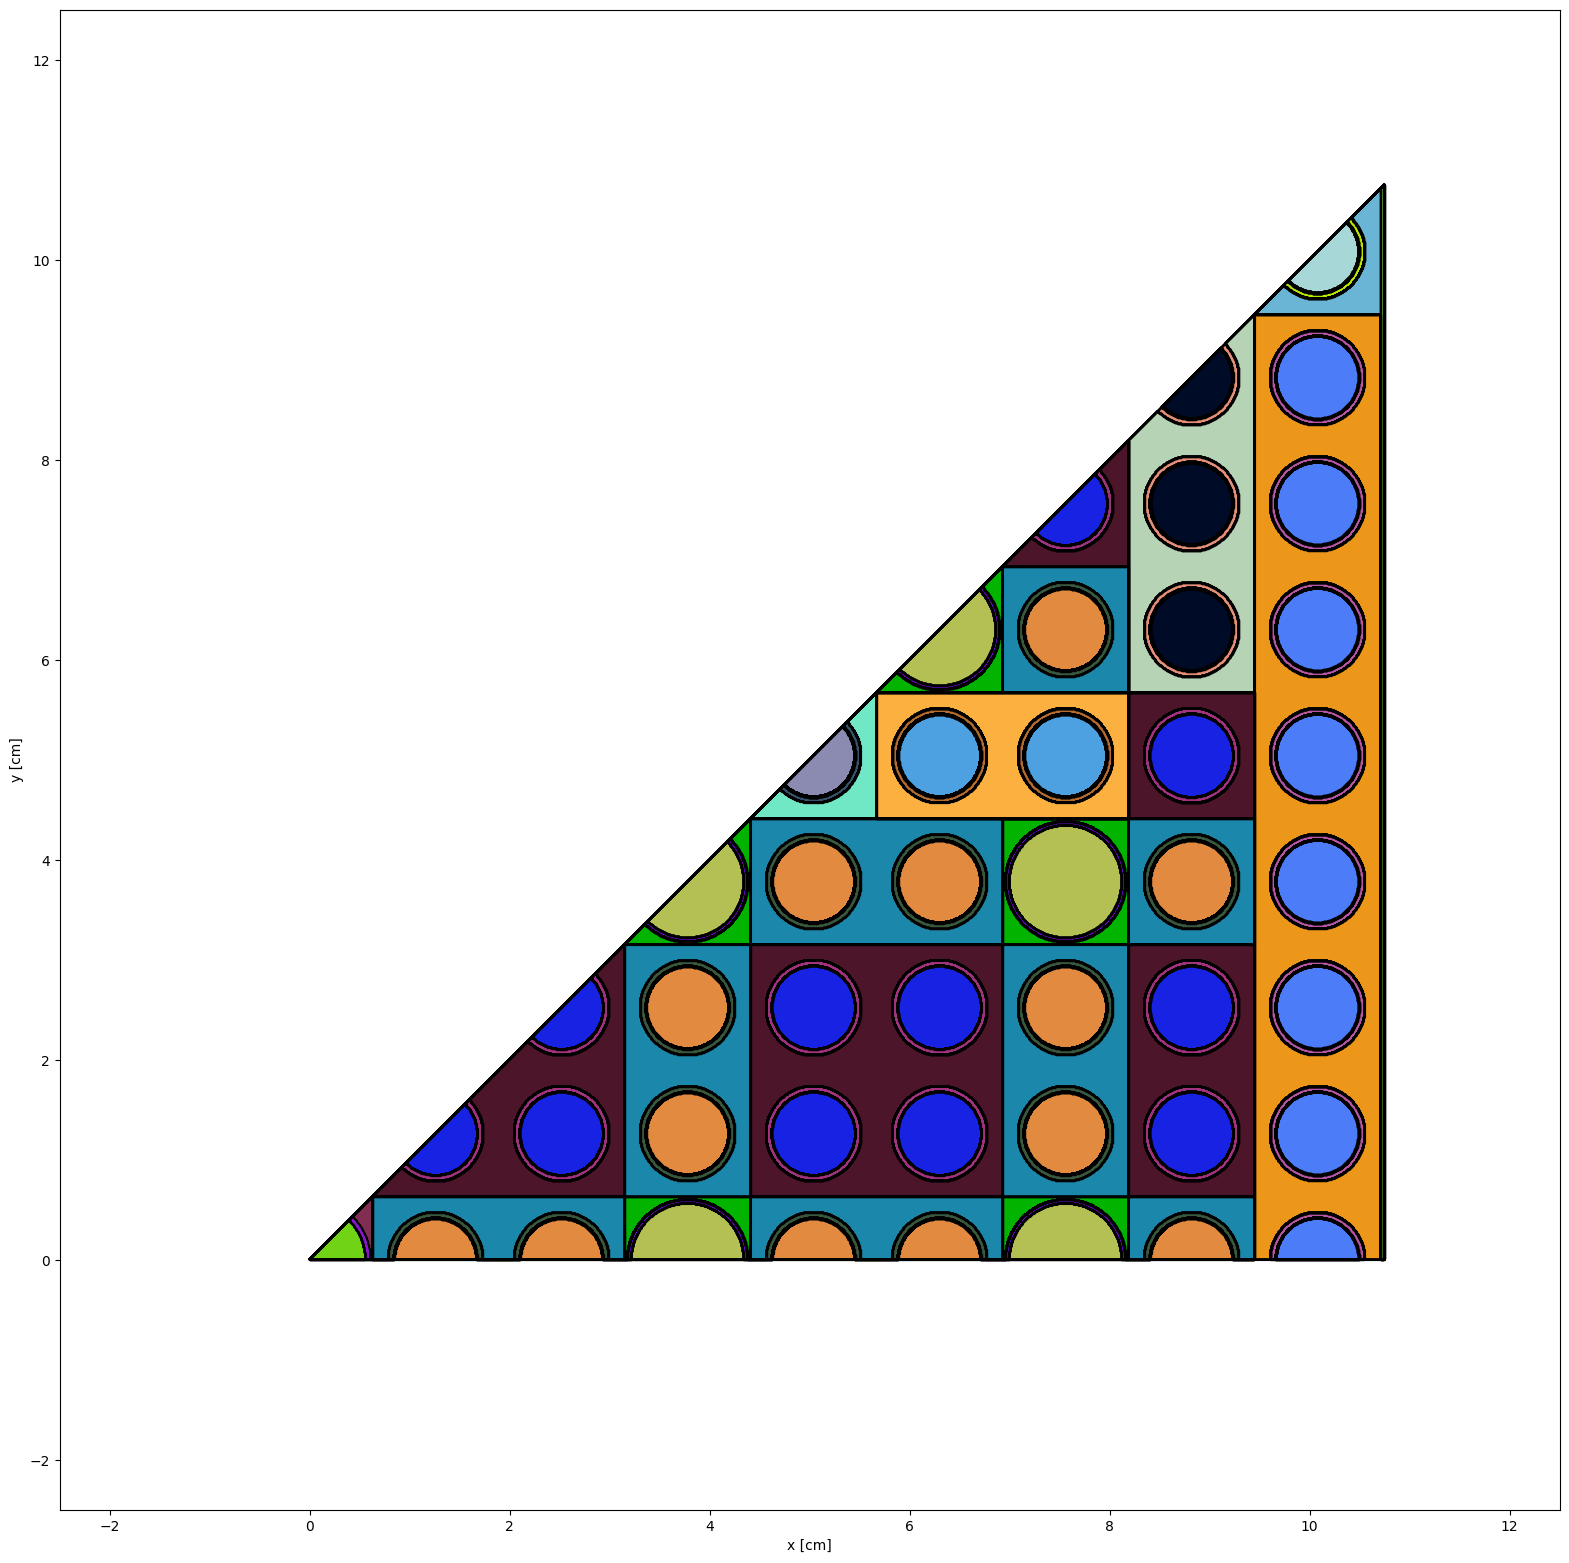

In [19]:
runtest(7,'SHEM-361')

cell name frequency:
"c": 4
"e": 60
"n": 20
"d": 76
"f": 84
"fd": 16
"gt": 24
"dd": 4
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=2626.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1316.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1324.
  warn(msg, IDWarning)


 Reading Zr94 from /home/brent10/nndc_hdf5/neutron/Zr94.h5
 Reading Zr96 from /home/brent10/nndc_hdf5/neutron/Zr96.h5
 Reading Sn112 from /home/brent10/nndc_hdf5/neutron/Sn112.h5
 Reading Sn114 from /home/brent10/nndc_hdf5/neutron/Sn114.h5
 Reading Sn115 from /home/brent10/nndc_hdf5/neutron/Sn115.h5
 Reading Sn116 from /home/brent10/nndc_hdf5/neutron/Sn116.h5
 Reading Sn117 from /home/brent10/nndc_hdf5/neutron/Sn117.h5
 Reading Sn118 from /home/brent10/nndc_hdf5/neutron/Sn118.h5
 Reading Sn119 from /home/brent10/nndc_hdf5/neutron/Sn119.h5
 Reading Sn120 from /home/brent10/nndc_hdf5/neutron/Sn120.h5
 Reading Sn122 from /home/brent10/nndc_hdf5/neutron/Sn122.h5
 Reading Sn124 from /home/brent10/nndc_hdf5/neutron/Sn124.h5
 Reading Fe54 from /home/brent10/nndc_hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/brent10/nndc_hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/brent10/nndc_hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/brent10/nndc_hdf5/neutron/Fe58.h5
 Reading Cr50 from /home/brent10/nnd

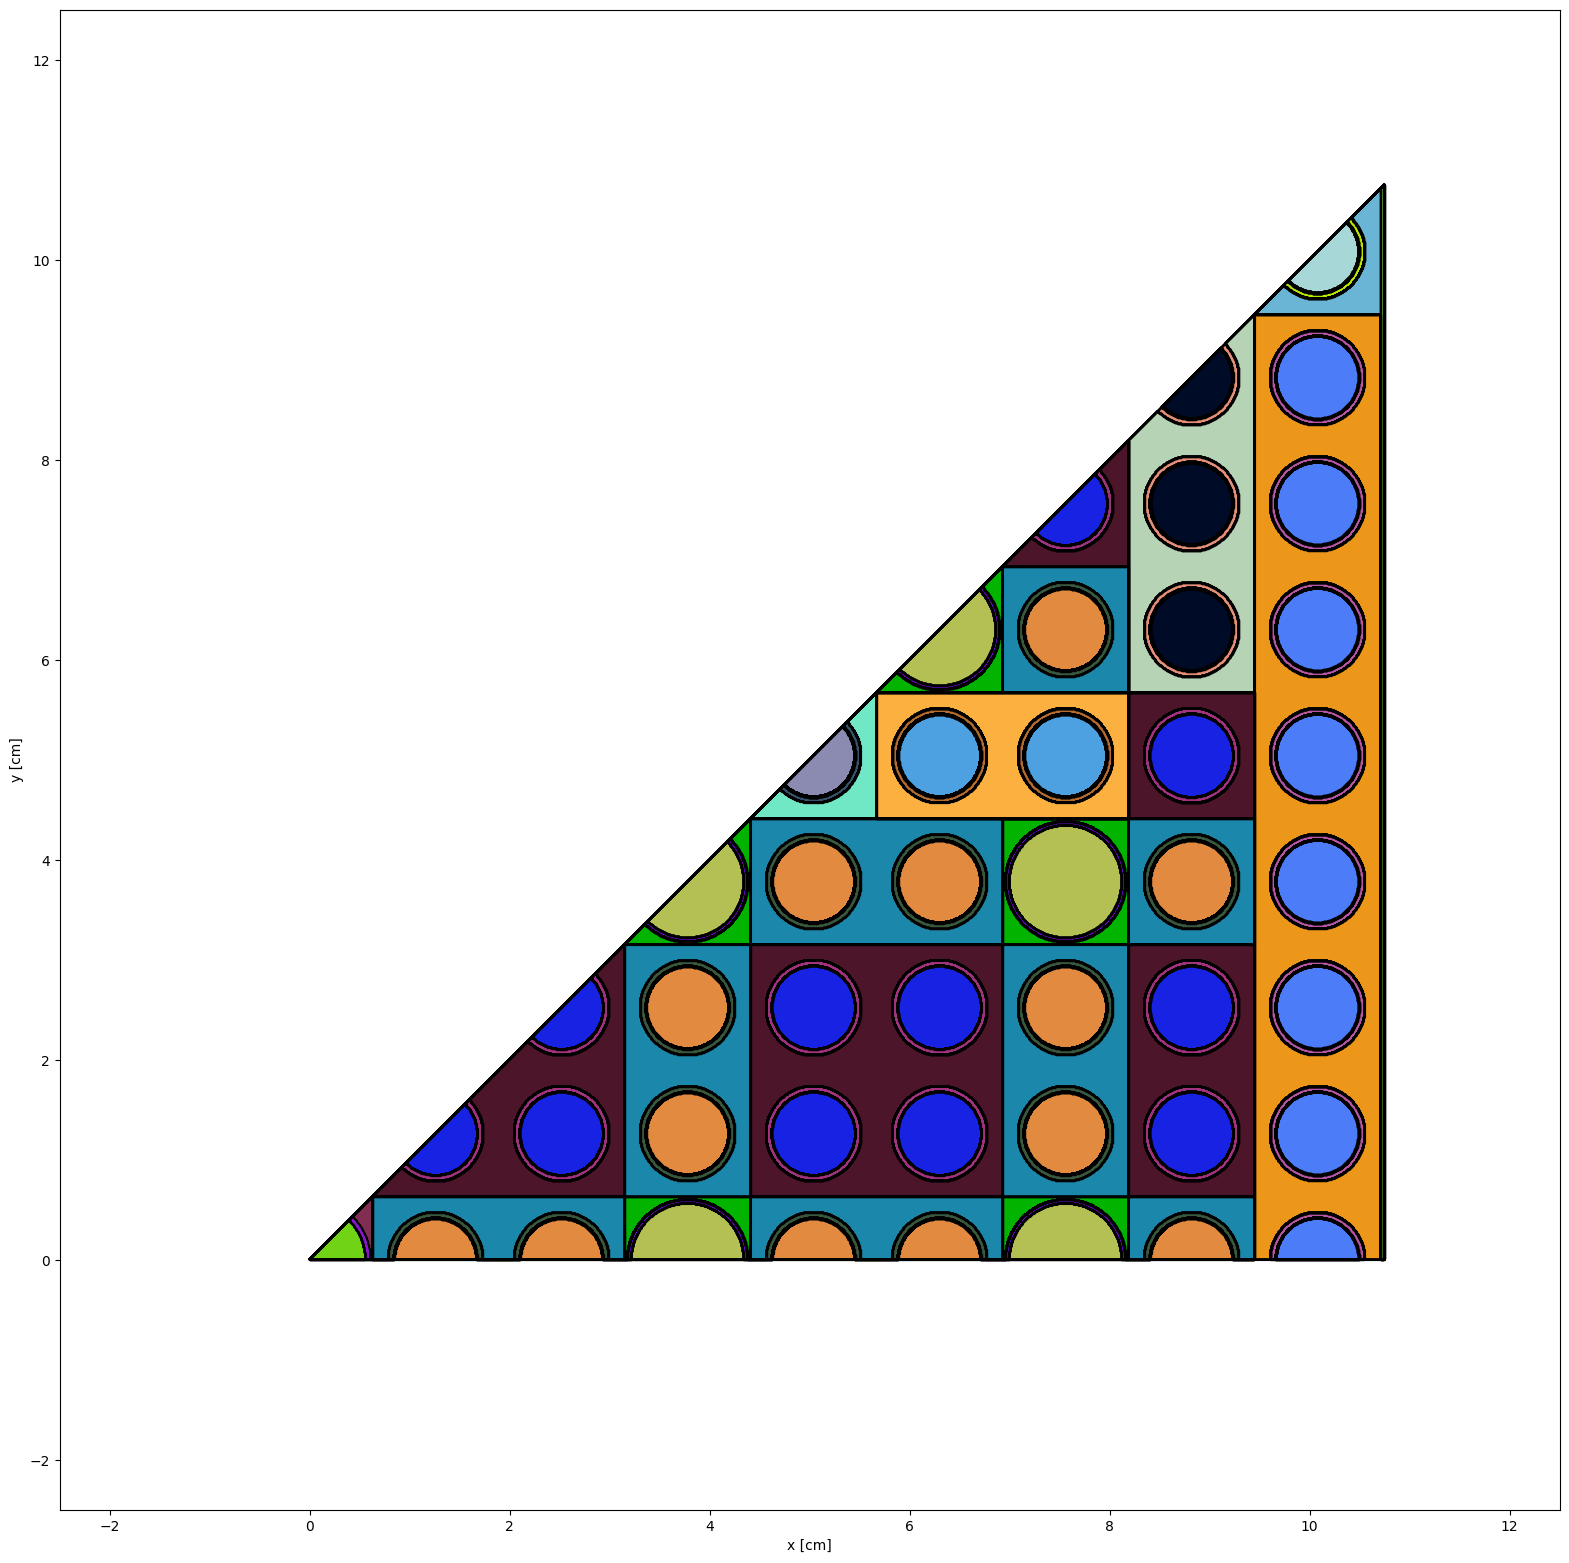

In [20]:
runtest(7,'XMAS-172')

cell name frequency:
"c": 4
"e": 60
"n": 20
"d": 76
"f": 84
"fd": 16
"gt": 24
"dd": 4
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3939.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=2629.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=2637.
  warn(msg, IDWarning)


 Reading Zr96 from /home/brent10/nndc_hdf5/neutron/Zr96.h5
 Reading Sn112 from /home/brent10/nndc_hdf5/neutron/Sn112.h5
 Reading Sn114 from /home/brent10/nndc_hdf5/neutron/Sn114.h5
 Reading Sn115 from /home/brent10/nndc_hdf5/neutron/Sn115.h5
 Reading Sn116 from /home/brent10/nndc_hdf5/neutron/Sn116.h5
 Reading Sn117 from /home/brent10/nndc_hdf5/neutron/Sn117.h5
 Reading Sn118 from /home/brent10/nndc_hdf5/neutron/Sn118.h5
 Reading Sn119 from /home/brent10/nndc_hdf5/neutron/Sn119.h5
 Reading Sn120 from /home/brent10/nndc_hdf5/neutron/Sn120.h5
 Reading Sn122 from /home/brent10/nndc_hdf5/neutron/Sn122.h5
 Reading Sn124 from /home/brent10/nndc_hdf5/neutron/Sn124.h5
 Reading Fe54 from /home/brent10/nndc_hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/brent10/nndc_hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/brent10/nndc_hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/brent10/nndc_hdf5/neutron/Fe58.h5
 Reading Cr50 from /home/brent10/nndc_hdf5/neutron/Cr50.h5
 Reading Cr52 from /home/brent10/nnd

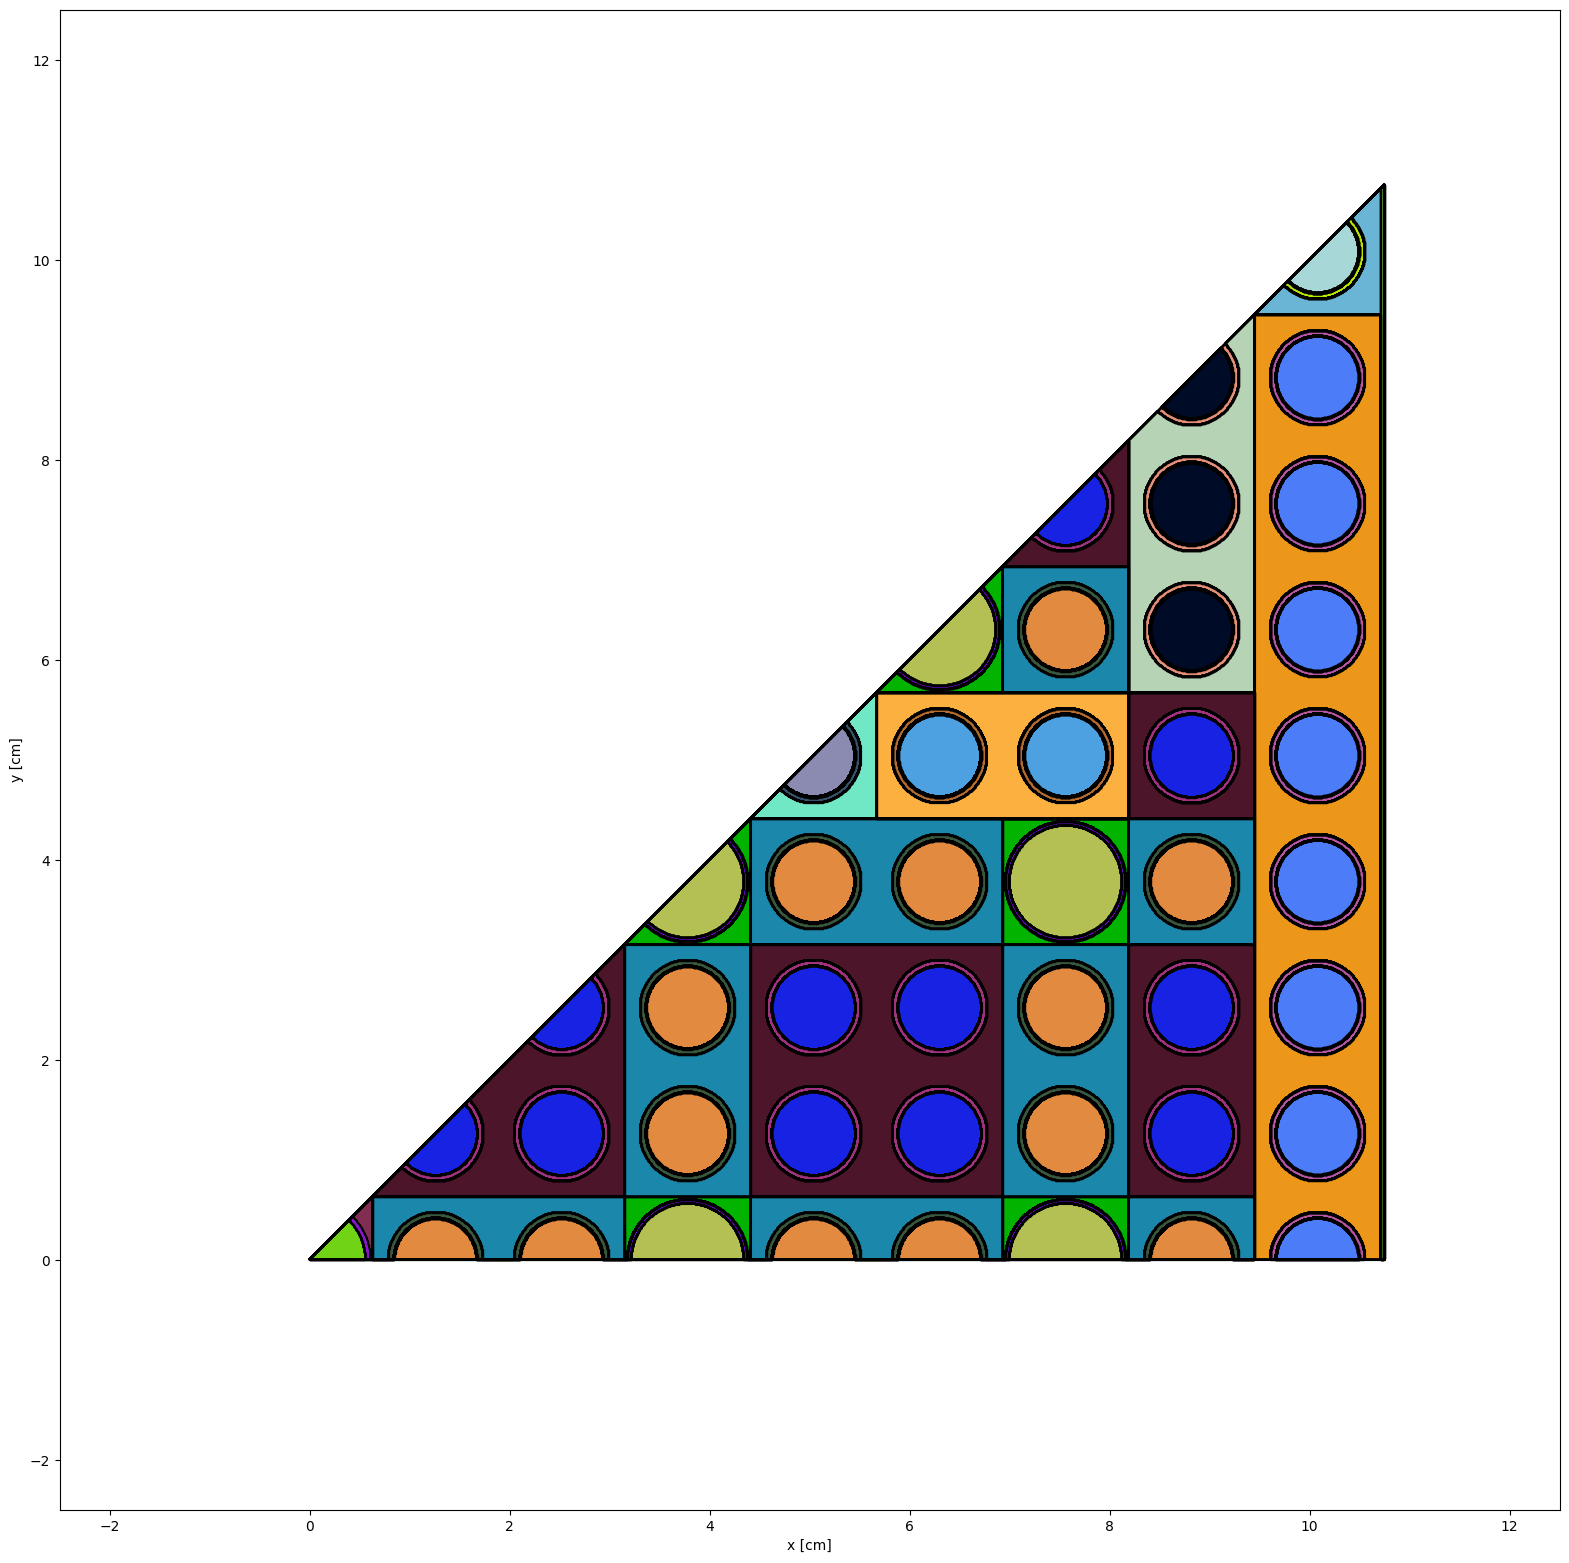

In [21]:
runtest(7,'CASMO-70')

cell name frequency:
"c": 4
"e": 60
"n": 20
"d": 76
"f": 84
"fd": 16
"gt": 24
"dd": 4
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5252.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3942.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3950.
  warn(msg, IDWarning)


 Reading Zr96 from /home/brent10/nndc_hdf5/neutron/Zr96.h5
 Reading Sn112 from /home/brent10/nndc_hdf5/neutron/Sn112.h5
 Reading Sn114 from /home/brent10/nndc_hdf5/neutron/Sn114.h5
 Reading Sn115 from /home/brent10/nndc_hdf5/neutron/Sn115.h5
 Reading Sn116 from /home/brent10/nndc_hdf5/neutron/Sn116.h5
 Reading Sn117 from /home/brent10/nndc_hdf5/neutron/Sn117.h5
 Reading Sn118 from /home/brent10/nndc_hdf5/neutron/Sn118.h5
 Reading Sn119 from /home/brent10/nndc_hdf5/neutron/Sn119.h5
 Reading Sn120 from /home/brent10/nndc_hdf5/neutron/Sn120.h5
 Reading Sn122 from /home/brent10/nndc_hdf5/neutron/Sn122.h5
 Reading Sn124 from /home/brent10/nndc_hdf5/neutron/Sn124.h5
 Reading Fe54 from /home/brent10/nndc_hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/brent10/nndc_hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/brent10/nndc_hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/brent10/nndc_hdf5/neutron/Fe58.h5
 Reading Cr50 from /home/brent10/nndc_hdf5/neutron/Cr50.h5
 Reading Cr52 from /home/brent10/nnd

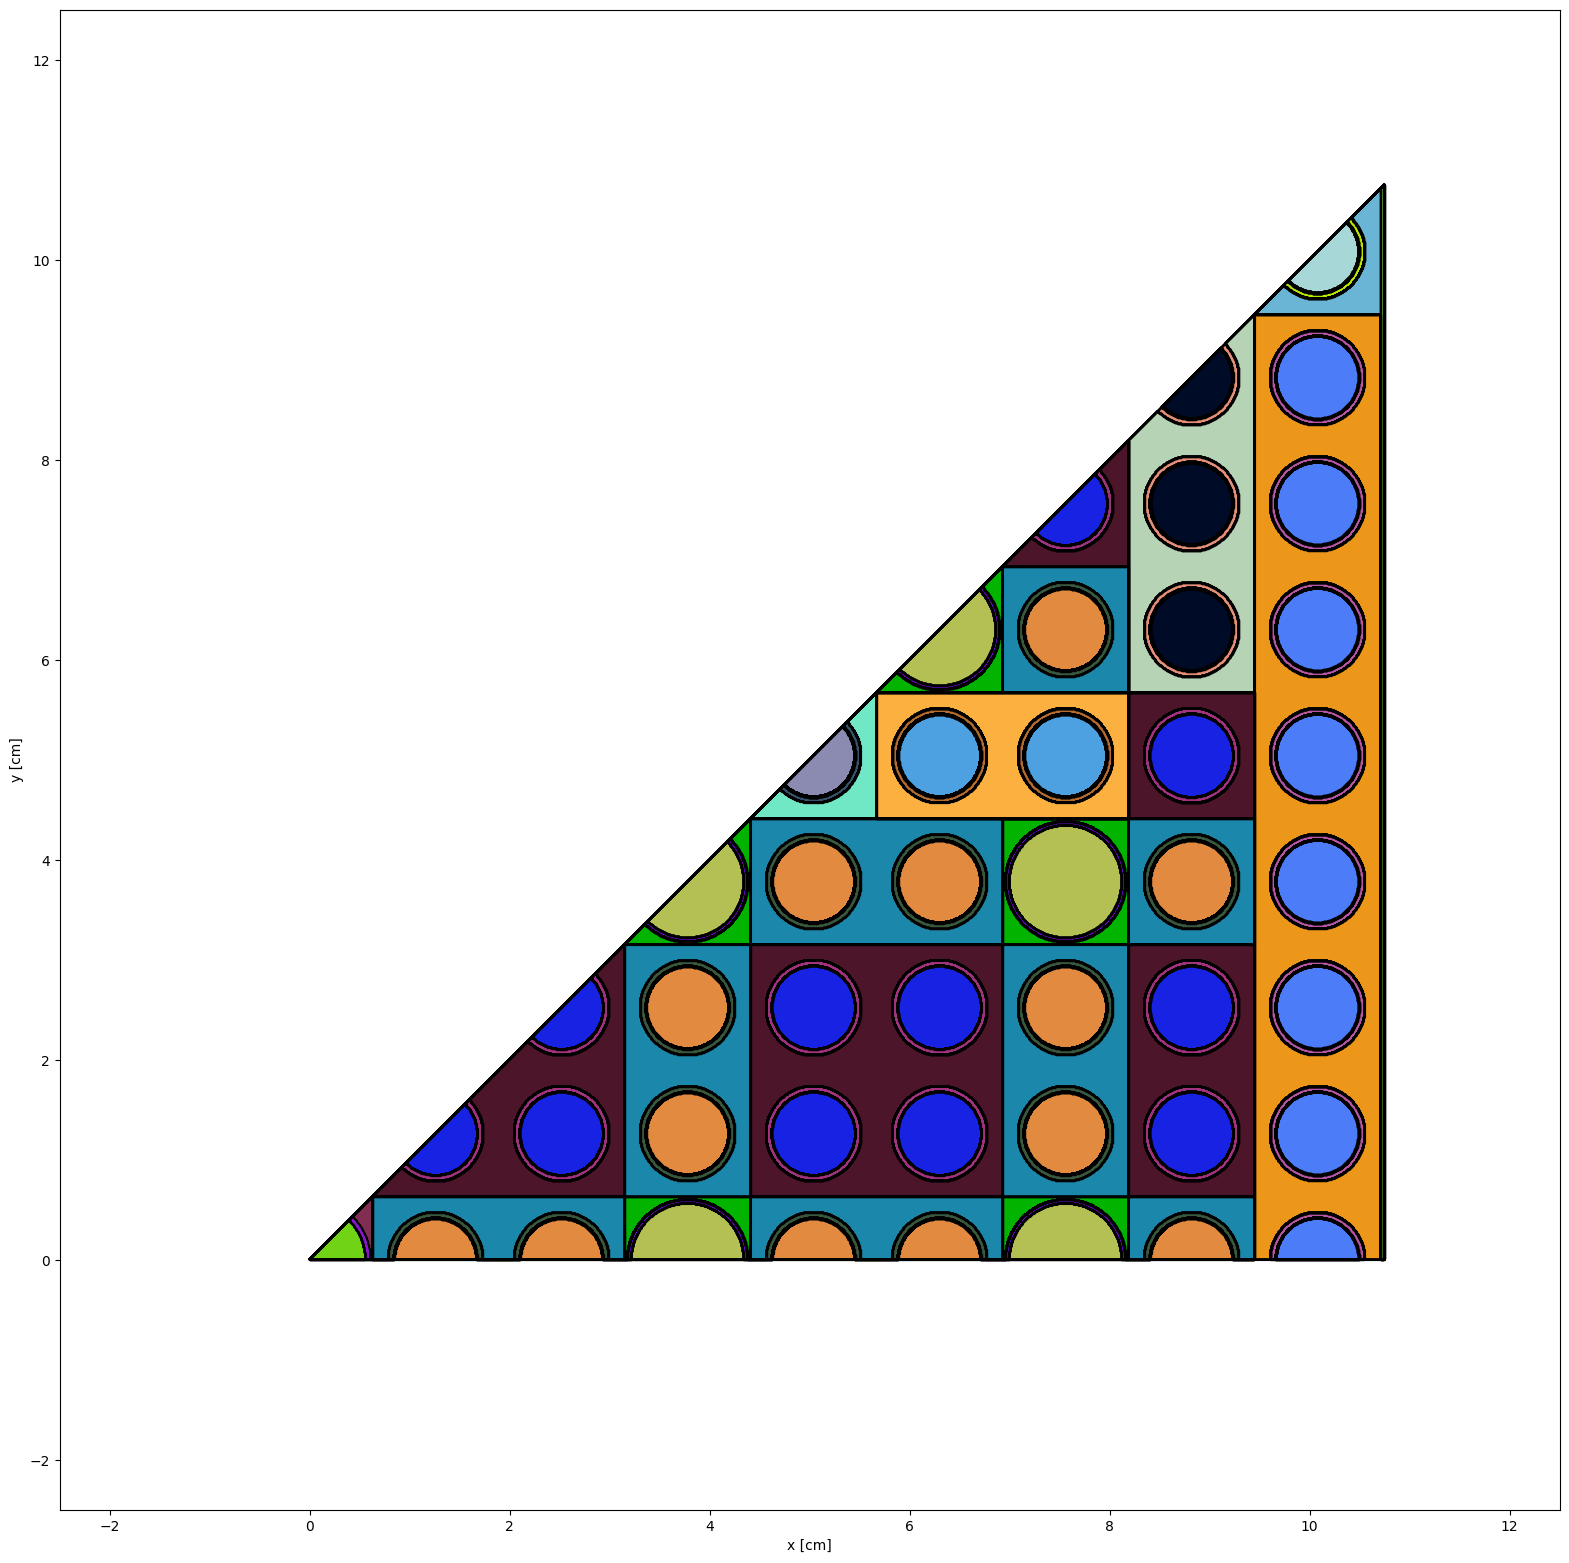

In [22]:
runtest(7,'CASMO-16')

cell name frequency:
"fu": 264
"gt": 24
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5653.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5255.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5263.
  warn(msg, IDWarning)


 Reading Zr94 from /home/brent10/nndc_hdf5/neutron/Zr94.h5
 Reading Zr96 from /home/brent10/nndc_hdf5/neutron/Zr96.h5
 Reading Sn112 from /home/brent10/nndc_hdf5/neutron/Sn112.h5
 Reading Sn114 from /home/brent10/nndc_hdf5/neutron/Sn114.h5
 Reading Sn115 from /home/brent10/nndc_hdf5/neutron/Sn115.h5
 Reading Sn116 from /home/brent10/nndc_hdf5/neutron/Sn116.h5
 Reading Sn117 from /home/brent10/nndc_hdf5/neutron/Sn117.h5
 Reading Sn118 from /home/brent10/nndc_hdf5/neutron/Sn118.h5
 Reading Sn119 from /home/brent10/nndc_hdf5/neutron/Sn119.h5
 Reading Sn120 from /home/brent10/nndc_hdf5/neutron/Sn120.h5
 Reading Sn122 from /home/brent10/nndc_hdf5/neutron/Sn122.h5
 Reading Sn124 from /home/brent10/nndc_hdf5/neutron/Sn124.h5
 Reading Fe54 from /home/brent10/nndc_hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/brent10/nndc_hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/brent10/nndc_hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/brent10/nndc_hdf5/neutron/Fe58.h5
 Reading Cr50 from /home/brent10/nnd

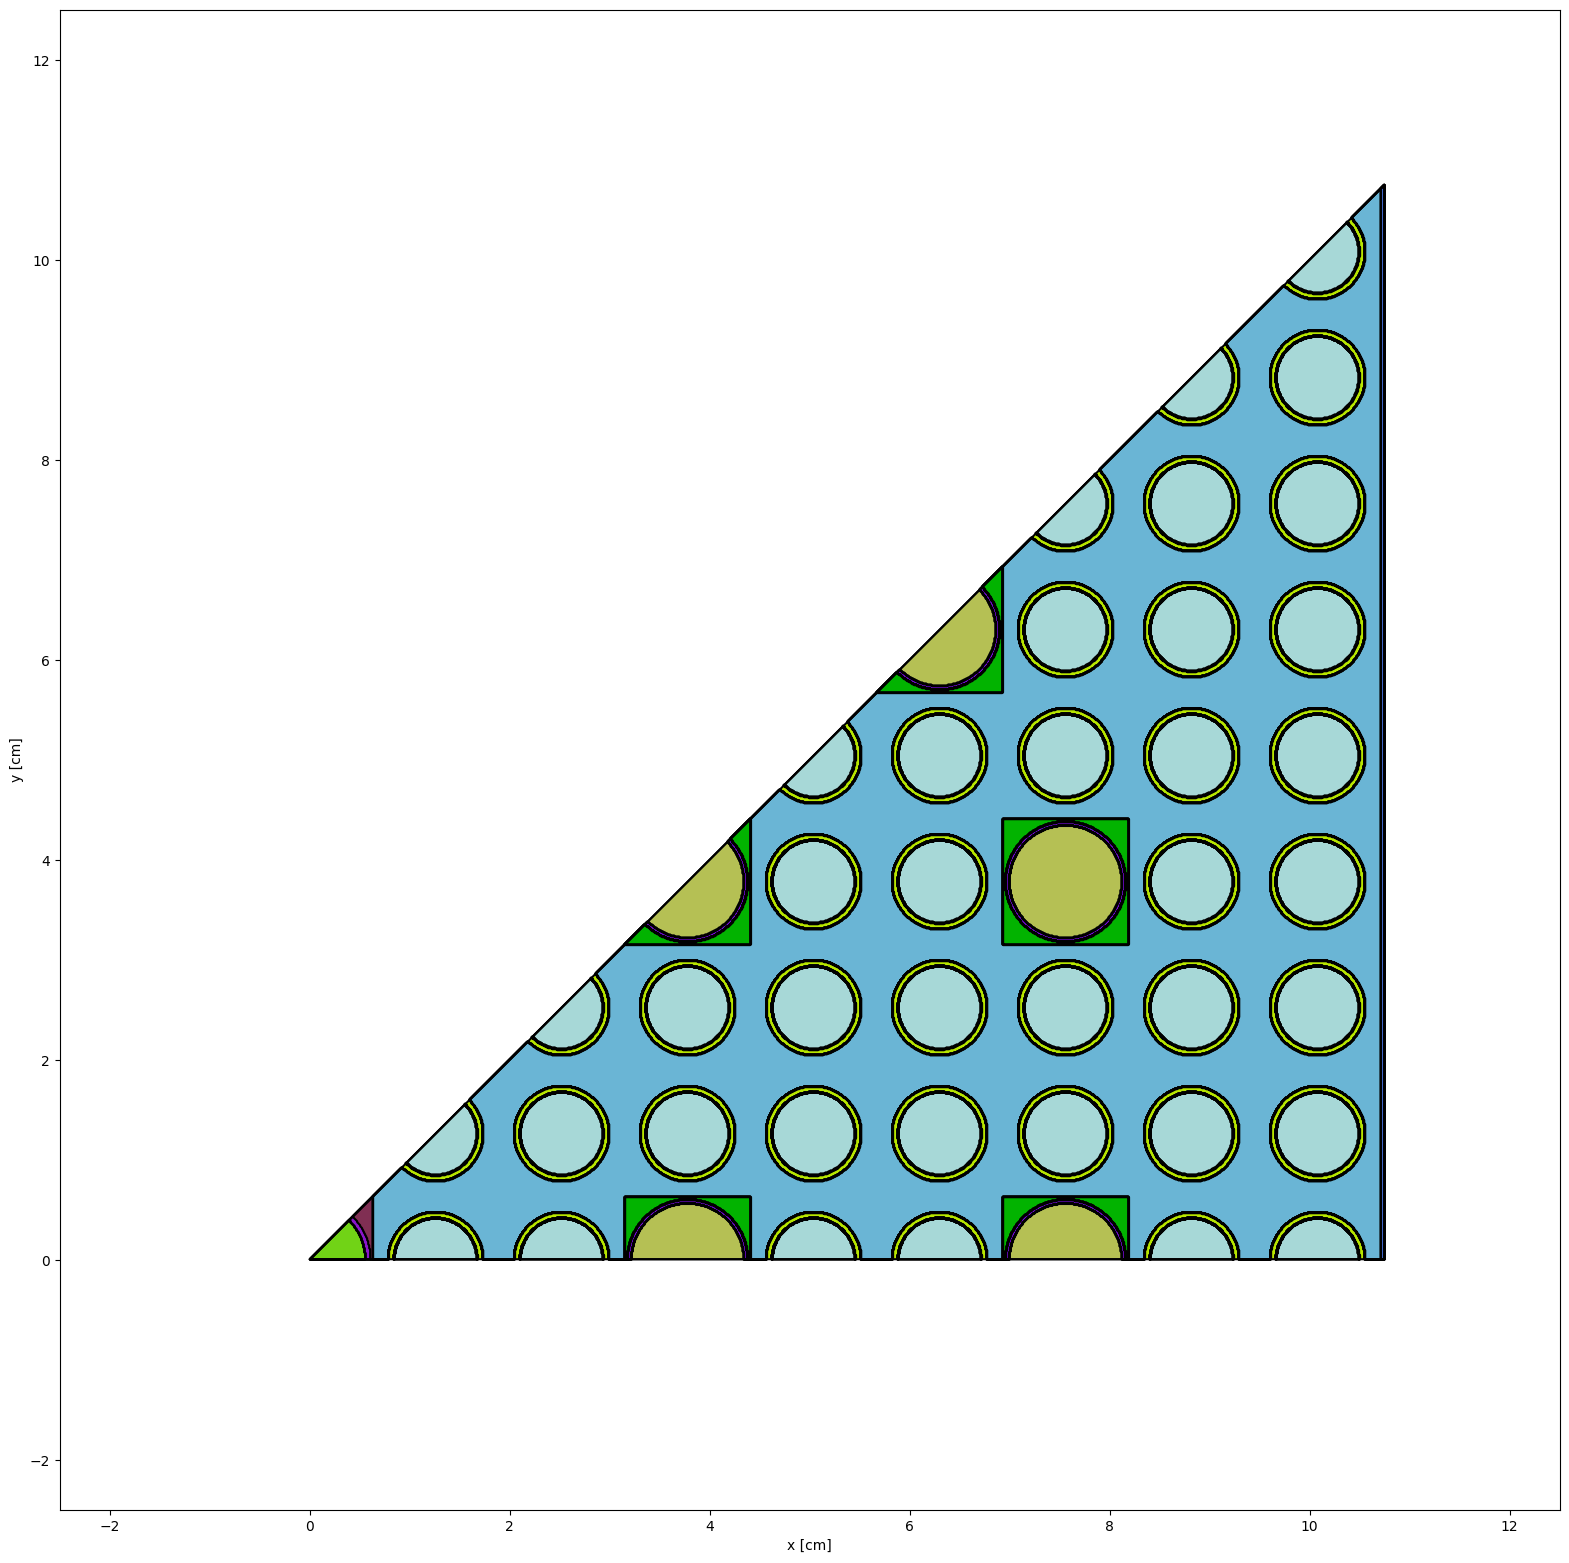

In [23]:
runtest(1,'SHEM-361')

cell name frequency:
"fu": 264
"gt": 24
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6054.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5656.
  warn(msg, IDWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5664.
  warn(msg, IDWarning)


 Reading Zr94 from /home/brent10/nndc_hdf5/neutron/Zr94.h5
 Reading Zr96 from /home/brent10/nndc_hdf5/neutron/Zr96.h5
 Reading Sn112 from /home/brent10/nndc_hdf5/neutron/Sn112.h5
 Reading Sn114 from /home/brent10/nndc_hdf5/neutron/Sn114.h5
 Reading Sn115 from /home/brent10/nndc_hdf5/neutron/Sn115.h5
 Reading Sn116 from /home/brent10/nndc_hdf5/neutron/Sn116.h5
 Reading Sn117 from /home/brent10/nndc_hdf5/neutron/Sn117.h5
 Reading Sn118 from /home/brent10/nndc_hdf5/neutron/Sn118.h5
 Reading Sn119 from /home/brent10/nndc_hdf5/neutron/Sn119.h5
 Reading Sn120 from /home/brent10/nndc_hdf5/neutron/Sn120.h5
 Reading Sn122 from /home/brent10/nndc_hdf5/neutron/Sn122.h5
 Reading Sn124 from /home/brent10/nndc_hdf5/neutron/Sn124.h5
 Reading Fe54 from /home/brent10/nndc_hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/brent10/nndc_hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/brent10/nndc_hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/brent10/nndc_hdf5/neutron/Fe58.h5
 Reading Cr50 from /home/brent10/nnd

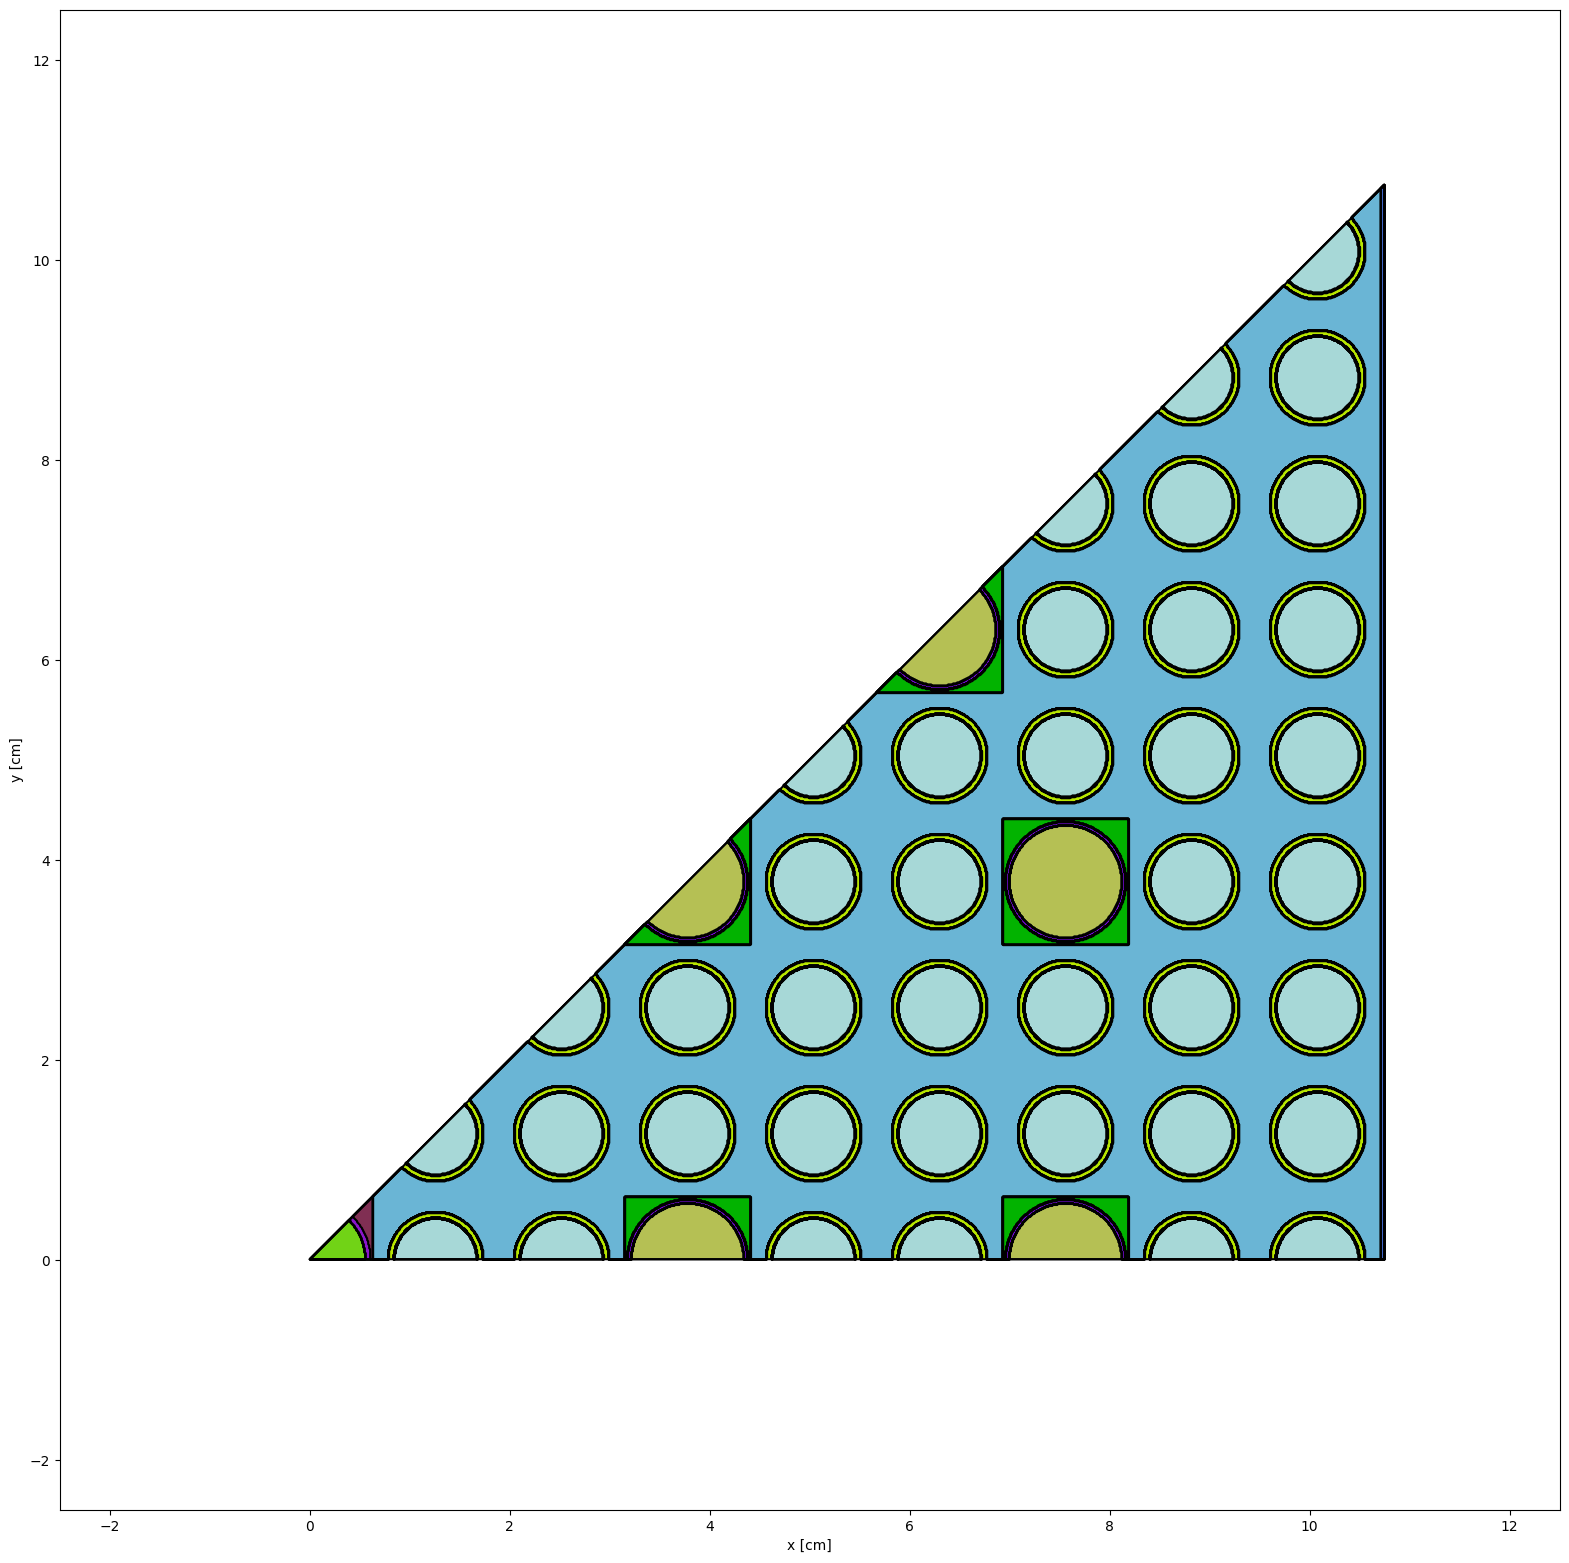

In [24]:
runtest(1,'XMAS-172')

cell name frequency:
"fu": 264
"gt": 24
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6455.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6057.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6065.
  warn(msg, IDWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

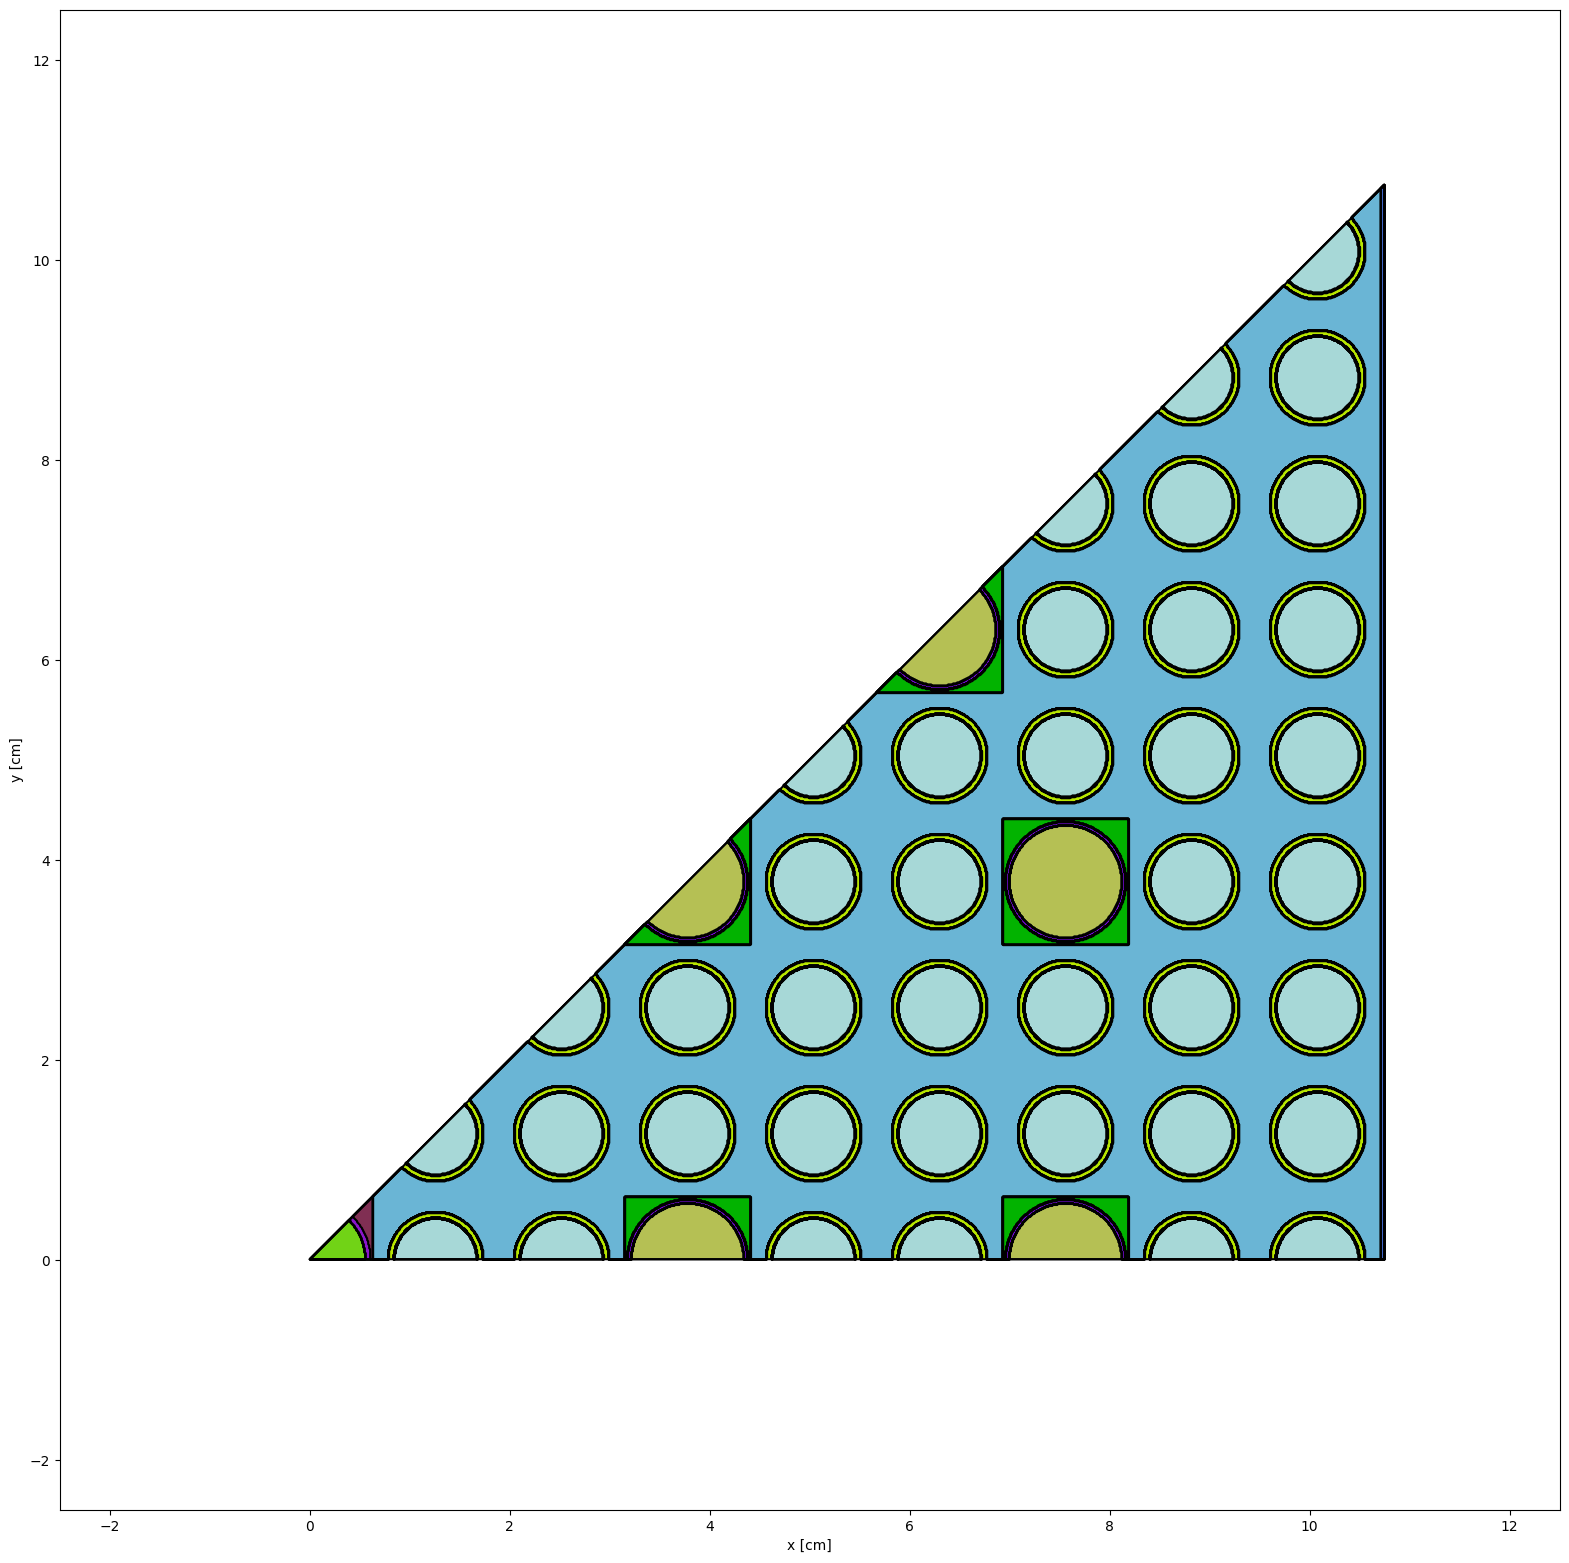

In [25]:
runtest(1,'CASMO-70')

cell name frequency:
"fu": 264
"gt": 24
"it": 1
total:  289


/home/brent10/openmc/lib/python3.12/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6856.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6458.
  warn(msg, IDWarning)
/home/brent10/openmc/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=6466.
  warn(msg, IDWarning)


sp NOT found
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ########

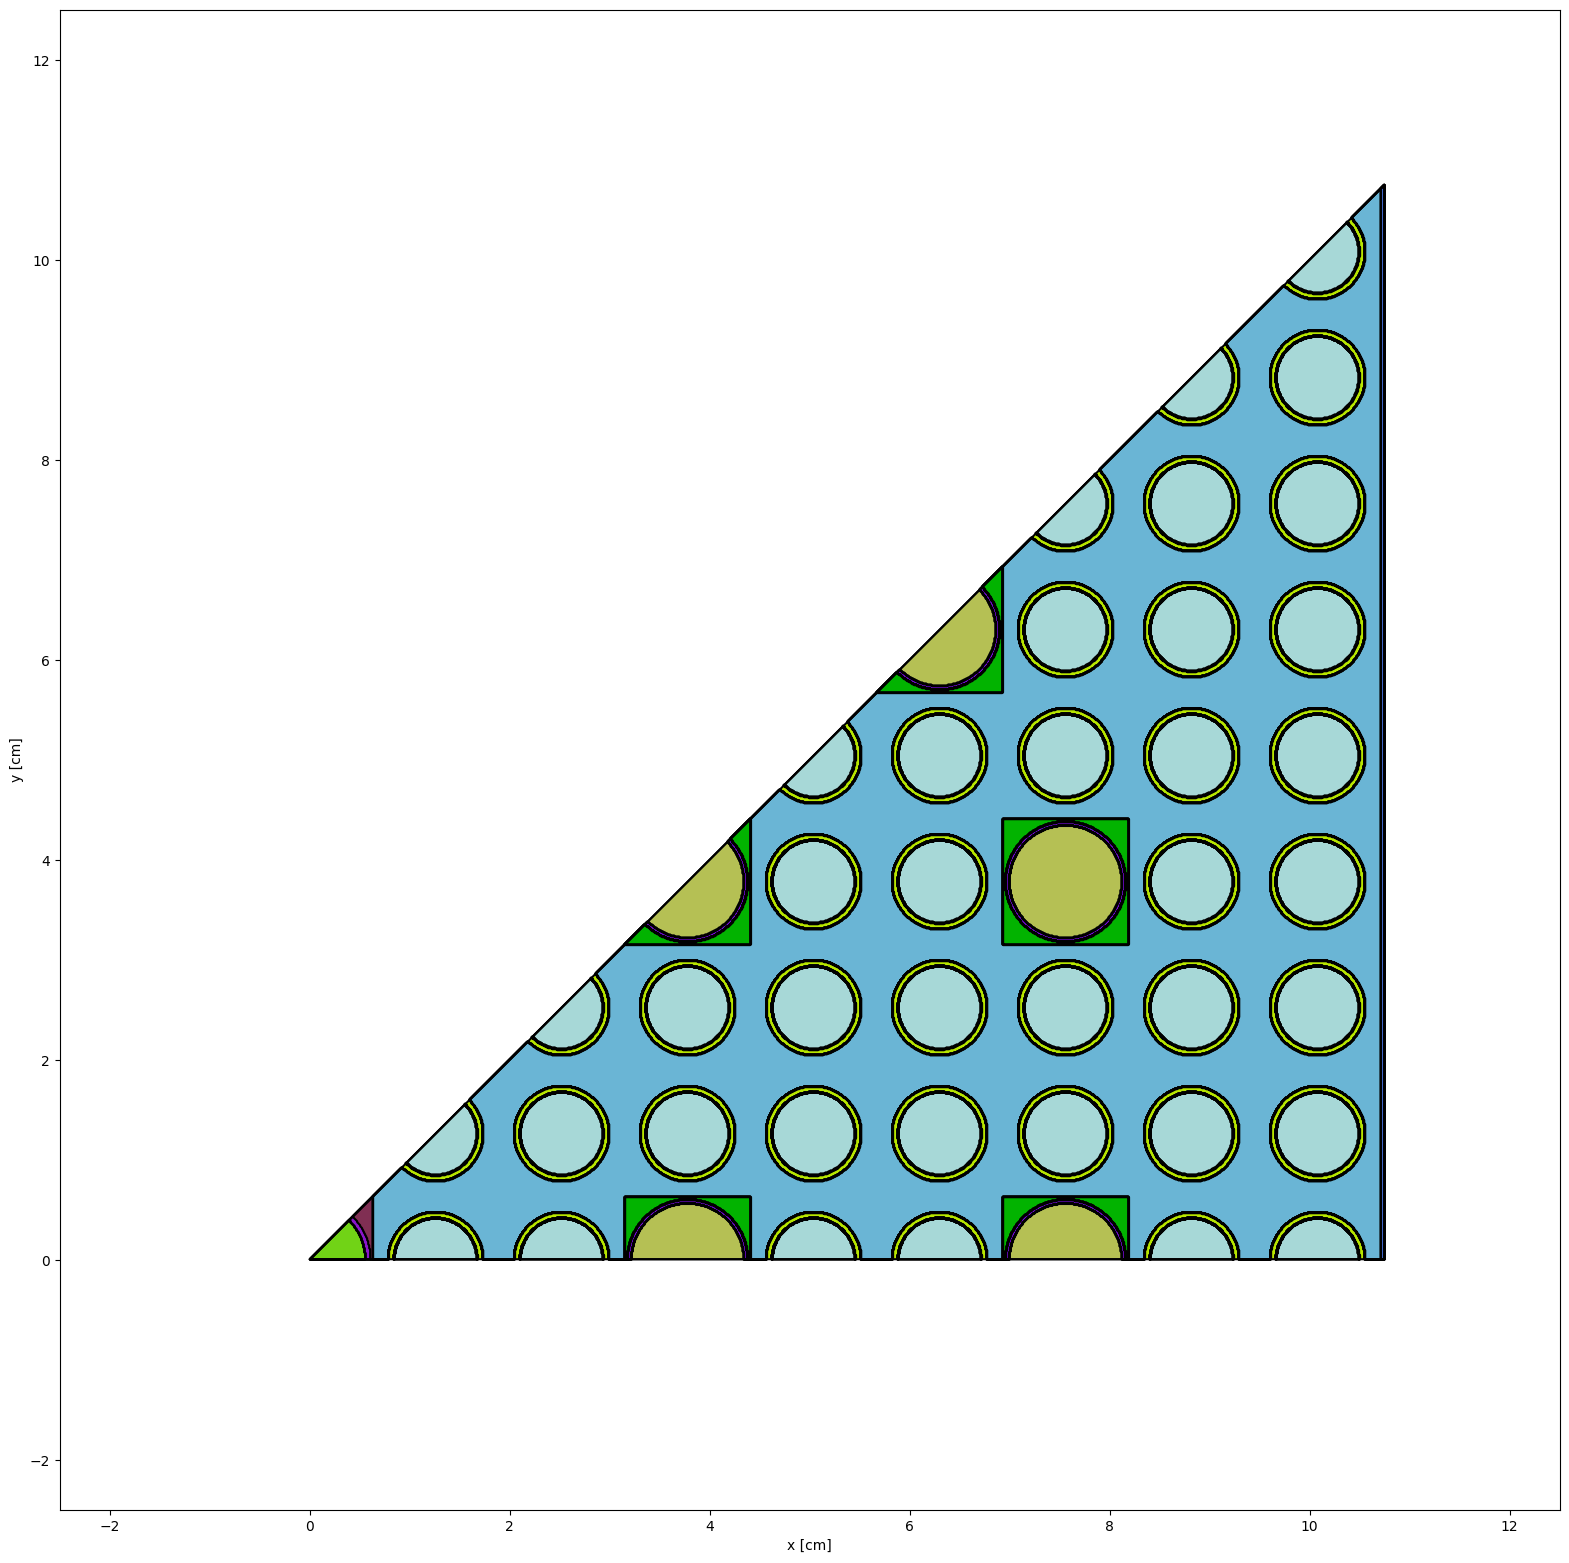

In [26]:
runtest(1,'CASMO-16')